<a href="https://colab.research.google.com/github/EighteenSprings/Pytorch_Tutorial/blob/main/PGGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github: https://github.com/rosinality/progressive-gan-pytorch  
Blog: https://samaelchen.github.io/pytorch-pggan/

In [38]:
!mkdir data
!cp /content/drive/MyDrive/GAN/Dataset/celebahq_128.zip ./
!unzip -q celebahq_128.zip -d data

mkdir: cannot create directory ‘data’: File exists
replace data/data128x128/20015.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A
A


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [43]:
import torch
import torchvision as tvision
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torch import nn
import torch.nn.functional as F

torch.Size([3, 128, 128])


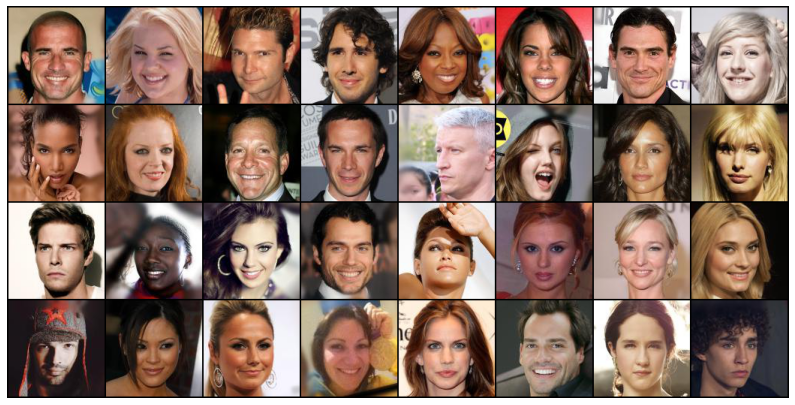

In [41]:
# test
transform = tvision.transforms.Compose([
    tvision.transforms.ToTensor(),
    tvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
datasets = tvision.datasets.ImageFolder('data', transform=transform)

test_data = next(iter(datasets))
print(test_data[0].shape)

dataloader = DataLoader(datasets, 32, shuffle=True)
test_batch,_ = next(iter(dataloader))

show_batch = make_grid(test_batch, normalize=True)

plt.figure(figsize=(14,15))
plt.imshow(show_batch.permute(1,2,0).numpy())
plt.axis('off')
plt.show()

In [42]:
# 调整图片尺寸
step = 0
init_size = 4
for step in range(6):
    print(init_size*2**step)

4
8
16
32
64
128


In [50]:
# 测试网络层数
test_in = torch.rand((1,100,1,1))
# test_out = F.interpolate(test_in, scale_factor=2)
# print(test_out.shape)
conv1 = nn.Conv2d(100,100,4,padding=3)
conv2 = nn.Conv2d(100,3,3,padding=1)
test_out = conv1(test_in)
test_out = conv2(test_out)
print(test_out.shape)

torch.Size([1, 3, 4, 4])
